## Classification Alogrithm

##### In this section i will discovering how to classifying mushrooms as poisonous or not. The goal is to finding which best model to fit  this mushroom clasification problem!. Also i try to implementing few of classification machine learning algorithm such as Logistic Regression, Random Forest, Naive Bayes, etc. After that i try to compare all of those algorithm perfomance to decide which one is the best algorithm model to solve this classifcation problem. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mushroom = pd.read_csv('mushrooms.csv')

In [3]:
mushroom = mushroom.rename(columns={'class':'class_m'})
mushroom.head()

,class_m,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


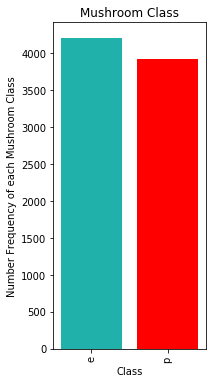

e    4208
p    3916
Name: class_m, dtype: int64


In [4]:
## Visualize The Data
plt.figure(figsize=(6,6))

labels = mushroom.class_m.unique()
values = mushroom.class_m.value_counts()

plt.subplot(1,2,1)
plt.title("Mushroom Class")
plt1 = mushroom.class_m.value_counts().plot('bar')
plt1.set(xlabel = "Class", ylabel = "Number Frequency of each Mushroom Class")
plt1.bar(labels, values, color=['lightseagreen', 'red'])
plt.show()

print(mushroom.class_m.value_counts())


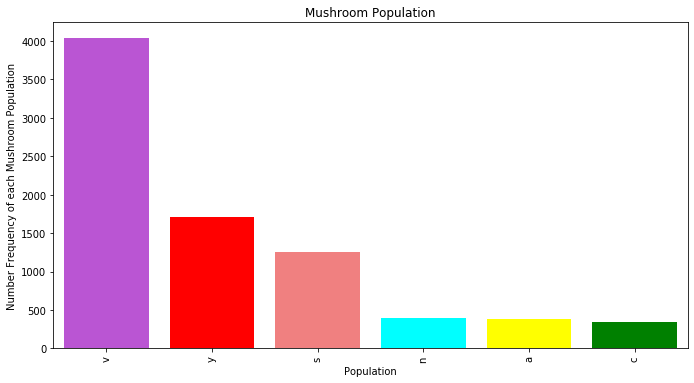

In [5]:
plt.figure(figsize=(25,6))

labels = mushroom.population.unique()
values = mushroom.population.value_counts()

plt.subplot(1,2,1)
plt.title("Mushroom Population")
plt1 = mushroom.population.value_counts().plot('bar')
plt1.set(xlabel = "Population", ylabel = "Number Frequency of each Mushroom Population")
plt1.bar(labels, values, color=['mediumorchid', 'red', 'lightcoral','cyan','yellow','green'])
plt.show()




#### Let's Seperate the data into 2 main variabels label and features. label are the variabel that i use to store the values which want to predict. Features are the variabels that i use to store the feature data to helping algorithm make a prediction

In [6]:
y = mushroom['class_m']
X = mushroom.drop(columns=['class_m'],axis=1)

In [7]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


##### Because basic Logistic Regression model can't parsing string data to make prediction. So i need to convert all of those y label values from string into int. I am replacing "e" values with 0 which means The Mushroom are not poisonus. And replacing "p" values with 1 which means the mushroom are poisonus.

In [8]:
y =  y.replace({'e':0,'p':1})
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_m, dtype: int64

### Split The Data!!

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state=1)


### Logistc Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
Linear_reg.score(X_train,y_train)

1.0

## Evaluation Metrics

In [13]:
from sklearn import metrics

def metrics_evaluation(y, x):  
    mae = metrics.mean_absolute_error(y,x)
    mse = metrics.mean_squared_error(y, x)
    rmse = np.sqrt(metrics.mean_squared_error(y,x))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)


In [14]:
x_pred = Linear_reg.predict(X_test)

print('Test set evaluation:\n_____________________________________')
metrics_evaluation(y_test, x_pred)
print("=====================================")

Test set evaluation:
_____________________________________
MAE: 0.0013474223369495204
MSE: 0.0009278102352848936
RMSE: 0.030459977598233615


## Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=5)
    return pred.mean()

In [16]:
result_cross_validation = cross_val(Linear_reg)
print("result of Cross Validation : ", result_cross_validation)

result of Cross Validation :  0.969947881009916


### Result Of All Evaluation Metrics

In [17]:
def evaluate(y,x):
    mae = metrics.mean_absolute_error(y,x)
    mse = metrics.mean_squared_error(y,x)
    rmse = np.sqrt(metrics.mean_squared_error(y,x))
    return mae, mse, rmse,

In [18]:
results_evaluation = pd.DataFrame(data=[["Mushroom Logistic Regression", *evaluate(y_test,x_pred), result_cross_validation]], 
                                  columns=['Model','MAE','MSE','RMSE','Cross Validation'])
results_evaluation

,Model,MAE,MSE,RMSE,Cross Validation
0,Mushroom Logistic Regression,0.001347,0.000928,0.03046,0.969948


## References

- https://www.kaggle.com/harshsdw/let-s-find-who-can-classify-mushrooms-best